<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [57]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-06 07:48:56--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  68.8MB/s    in 2.9s    

2025-07-06 07:48:59 (68.8 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [58]:
!pip install pandas

In [59]:
!pip install matplotlib

In [60]:
!pip install seaborn
import seaborn as sns

In [61]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [62]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [63]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [64]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [65]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [66]:
QUERY = """
SELECT * 
FROM main 

"""
df = pd.read_sql_query(QUERY, conn)
print(df)


       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            RemoteWork   Check  \
0      Employed, full-time                     

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [68]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [69]:
## Write your code here
mode_CompTotal = df['CompTotal'].mode()[0]
df['CompTotal'] = df['CompTotal'].fillna(mode_CompTotal)

In [70]:
CompTotal_list=df['CompTotal'].unique().tolist()
print(len(CompTotal_list))

3337


In [71]:
CompTotal_vc = \
df.loc[:,'CompTotal'].value_counts().sort_values(ascending=False)

top_100_CompTotal_vc = \
CompTotal_vc.iloc[0:50]

In [72]:
top_100_CompTotal_vc

CompTotal
100000.0     32636
60000.0        839
120000.0       793
80000.0        728
50000.0        705
150000.0       660
70000.0        624
200000.0       608
90000.0        558
130000.0       459
40000.0        455
75000.0        447
110000.0       443
180000.0       428
140000.0       405
65000.0        397
45000.0        378
30000.0        372
55000.0        348
250000.0       336
300000.0       336
160000.0       333
85000.0        325
600000.0       263
72000.0        248
48000.0        241
170000.0       240
500000.0       233
1200000.0      233
36000.0        232
1000000.0      221
125000.0       219
400000.0       214
35000.0        204
95000.0        201
42000.0        200
105000.0       196
240000.0       187
24000.0        173
115000.0       173
20000.0        168
25000.0        167
800000.0       161
220000.0       157
2000000.0      155
190000.0       152
135000.0       152
1500000.0      143
175000.0       142
12000.0        142
Name: count, dtype: int64

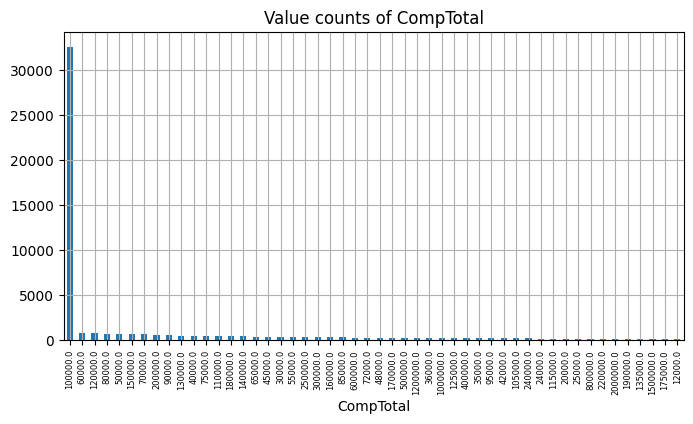

In [73]:
plt.figure(figsize=(8,4))
top_100_CompTotal_vc.plot.bar()
plt.title('Value counts of CompTotal')
plt.xticks(fontsize=6)
plt.grid()
plt.show()

In [74]:
df['CompTotal'].describe()

count     6.543700e+04
mean     1.528187e+145
std      3.909204e+147
min       0.000000e+00
25%       1.000000e+05
50%       1.000000e+05
75%       1.140000e+05
max      1.000000e+150
Name: CompTotal, dtype: float64

In [75]:
# Check the extremes
print("Top 10 values:")
print(df['CompTotal'].nlargest(10))

print("\nBottom 10 values:")
print(df['CompTotal'].nsmallest(10))

print(f"\nNull values: {df['CompTotal'].isnull().sum()}")
print(f"Zero values: {(df['CompTotal'] == 0).sum()}")

Top 10 values:
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64

Bottom 10 values:
697     0.0
1256    0.0
1930    0.0
2087    0.0
2290    0.0
2607    0.0
2736    0.0
3125    0.0
3962    0.0
4059    0.0
Name: CompTotal, dtype: float64

Null values: 0
Zero values: 127


In [76]:
# Check the extreme values
print("Top 10 highest values:")
print(df['CompTotal'].nlargest(10))

print("\nBottom 10 values:")
print(df['CompTotal'].nsmallest(10))

# Filter to reasonable salary range
df_clean = df[(df['CompTotal'] >= 10000) & (df['CompTotal'] <= 1000000)]

print(f"\nOriginal data points: {len(df)}")
print(f"After cleaning: {len(df_clean)}")
print(f"Removed: {len(df) - len(df_clean)} extreme outliers")

Top 10 highest values:
14354    1.000000e+150
34278     1.000000e+65
17374     1.000000e+53
8814      1.000000e+44
20037     8.000000e+27
24677     1.000000e+20
27268     1.111111e+15
52485     3.040302e+14
46992     7.587459e+13
59887     7.777778e+12
Name: CompTotal, dtype: float64

Bottom 10 values:
697     0.0
1256    0.0
1930    0.0
2087    0.0
2290    0.0
2607    0.0
2736    0.0
3125    0.0
3962    0.0
4059    0.0
Name: CompTotal, dtype: float64

Original data points: 65437
After cleaning: 60685
Removed: 4752 extreme outliers


In [77]:
df_clean = df_clean.copy()

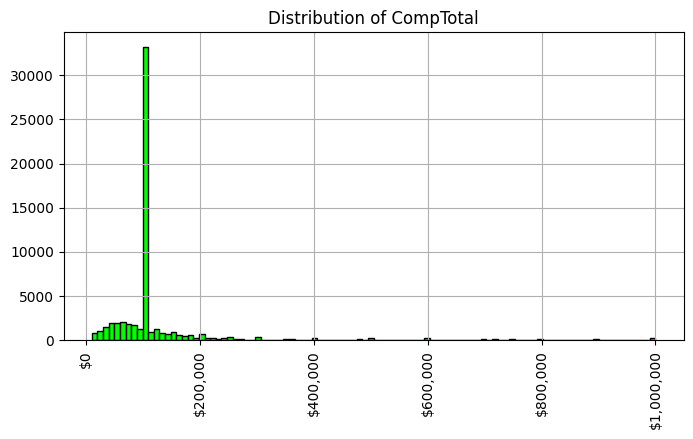

In [78]:
plt.figure(figsize=(8,4))
plt.hist(df_clean['CompTotal'],edgecolor='black',
        color='lime', density=False, bins=100)
plt.title('Distribution of CompTotal')
# plt.ticklabel_format(style='plain', axis='x') 
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
plt.xticks(rotation=90)
plt.grid()
plt.show()

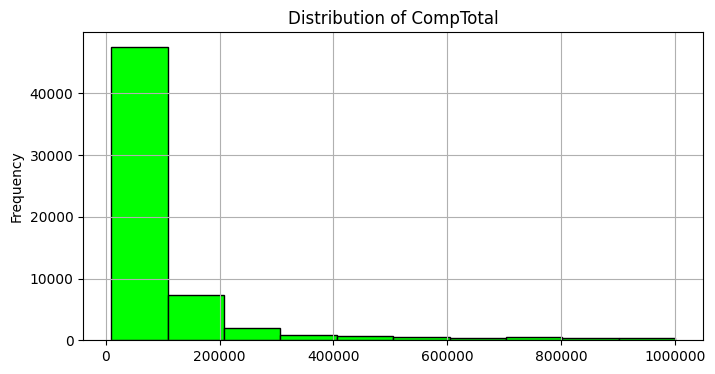

In [79]:
plt.figure(figsize=(8,4))
df_clean['CompTotal'].plot.hist( bins=10, edgecolor='black',
        color='lime', density=False)
plt.title('Distribution of CompTotal')
plt.ticklabel_format(style='plain', axis='x') 
plt.grid()
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [80]:
## Write your code here
df_clean['YearsCodePro'].dtype

dtype('O')

In [81]:
mode_YearsCodePro = df_clean['YearsCodePro'].mode()[0]
df_clean.loc[:,'YearsCodePro'] = df_clean['YearsCodePro'].fillna(mode_YearsCodePro)

In [82]:
# df_clean['YearsCodePro'].unique().tolist()

In [83]:
mapper_1 = {'Less than 1 year':'0', 'More than 50 years':'51'}
df_clean.loc[:, 'YearsCodePro'] = df_clean['YearsCodePro'].replace(mapper_1)

In [84]:
df_clean.loc[:, 'YearsCodePro'] = df_clean.loc[:, 'YearsCodePro'].astype(float)

In [85]:
df_clean.loc[:, 'YearsCodePro'].dtype

dtype('O')

In [86]:
df_clean.loc[:, 'YearsCodePro'].describe()

count     60685.0
unique       52.0
top           2.0
freq      17581.0
Name: YearsCodePro, dtype: float64

In [87]:
df_clean.loc[:, 'YearsCodePro'].median()

np.float64(5.0)

In [88]:
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].astype(float)

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


In [89]:
gb_age_sum = \
df_clean.groupby('Age')['CompTotal'].sum()

In [90]:
gb_age_sum.values

array([1.49401694e+09, 2.95680158e+09, 2.00053141e+09, 8.46041474e+08,
       3.44048748e+08, 8.93892020e+07, 3.29553010e+07, 2.56220815e+08])

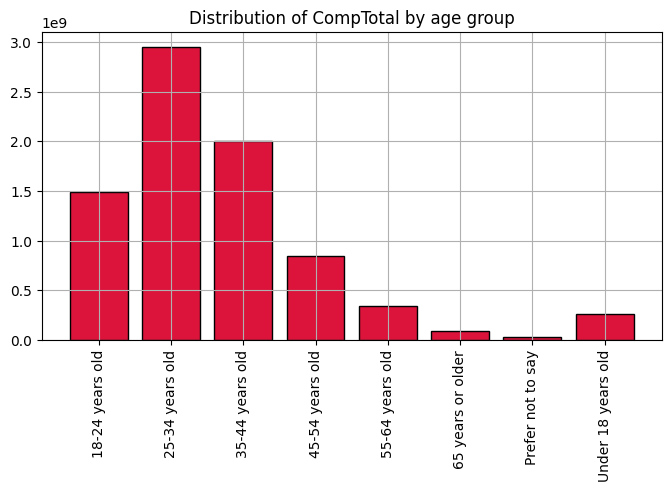

In [91]:
plt.figure(figsize=(8,4))
plt.bar(x=gb_age_sum.index.tolist(), height=gb_age_sum.values.tolist() ,edgecolor='black',
        color='crimson')
plt.title('Distribution of CompTotal by age group')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()


In [92]:
gb_age_count = \
df_clean.groupby('Age')['CompTotal'].count()

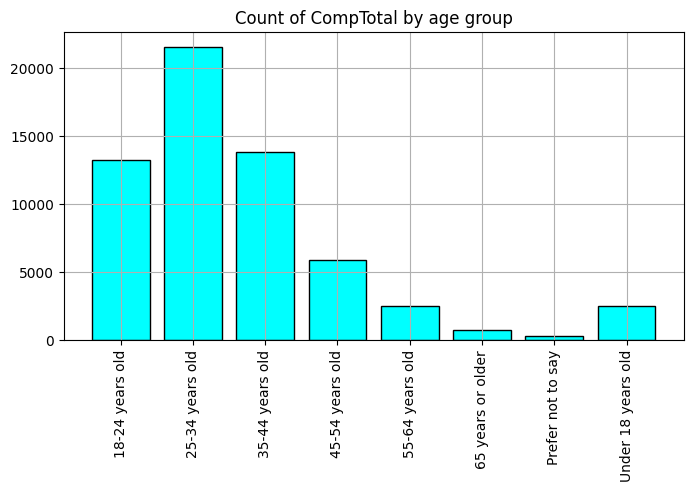

In [93]:
plt.figure(figsize=(8,4))
plt.bar(x=gb_age_count.index.tolist(), height=gb_age_count.values.tolist() , edgecolor='black',
        color='cyan')
plt.title('Count of CompTotal by age group')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

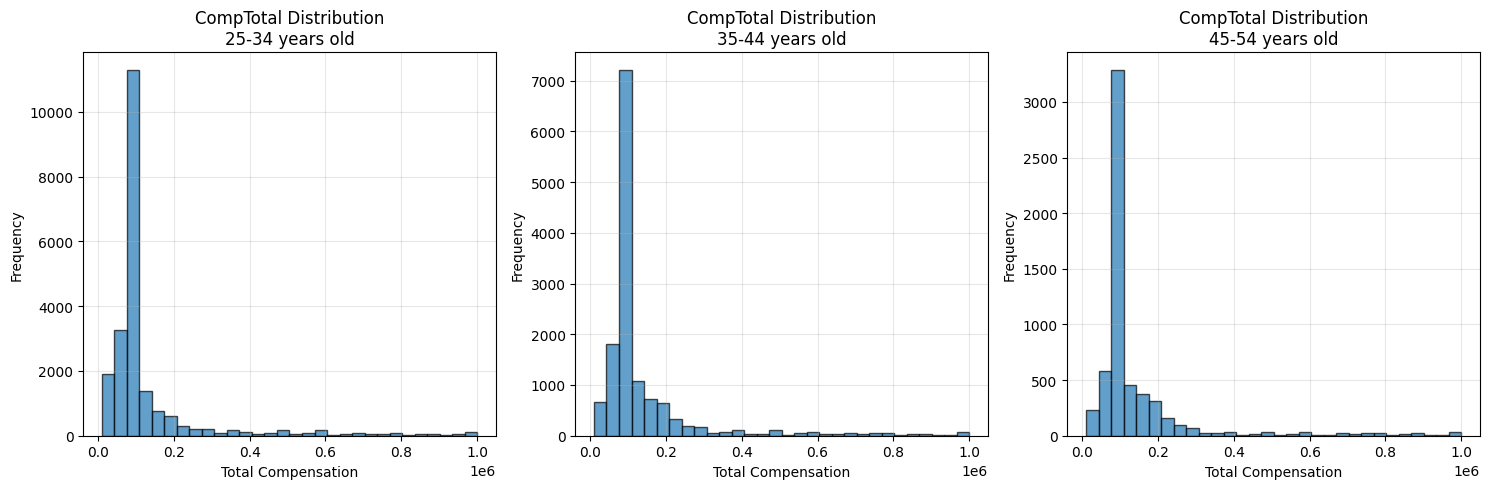

In [94]:
# Select key age groups for comparison
age_groups = ['25-34 years old', '35-44 years old', '45-54 years old']
# age_groups = df_clean['Age'].unique().tolist()
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, age_group in enumerate(age_groups):
    data = df_clean[df_clean['Age'] == age_group]['CompTotal']
    axes[i].hist(data, bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'CompTotal Distribution\n{age_group}')
    axes[i].set_xlabel('Total Compensation')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [95]:
# g = sns.FacetGrid(df_clean, col="Age")
# g.map(sns.histplot, "CompTotal")

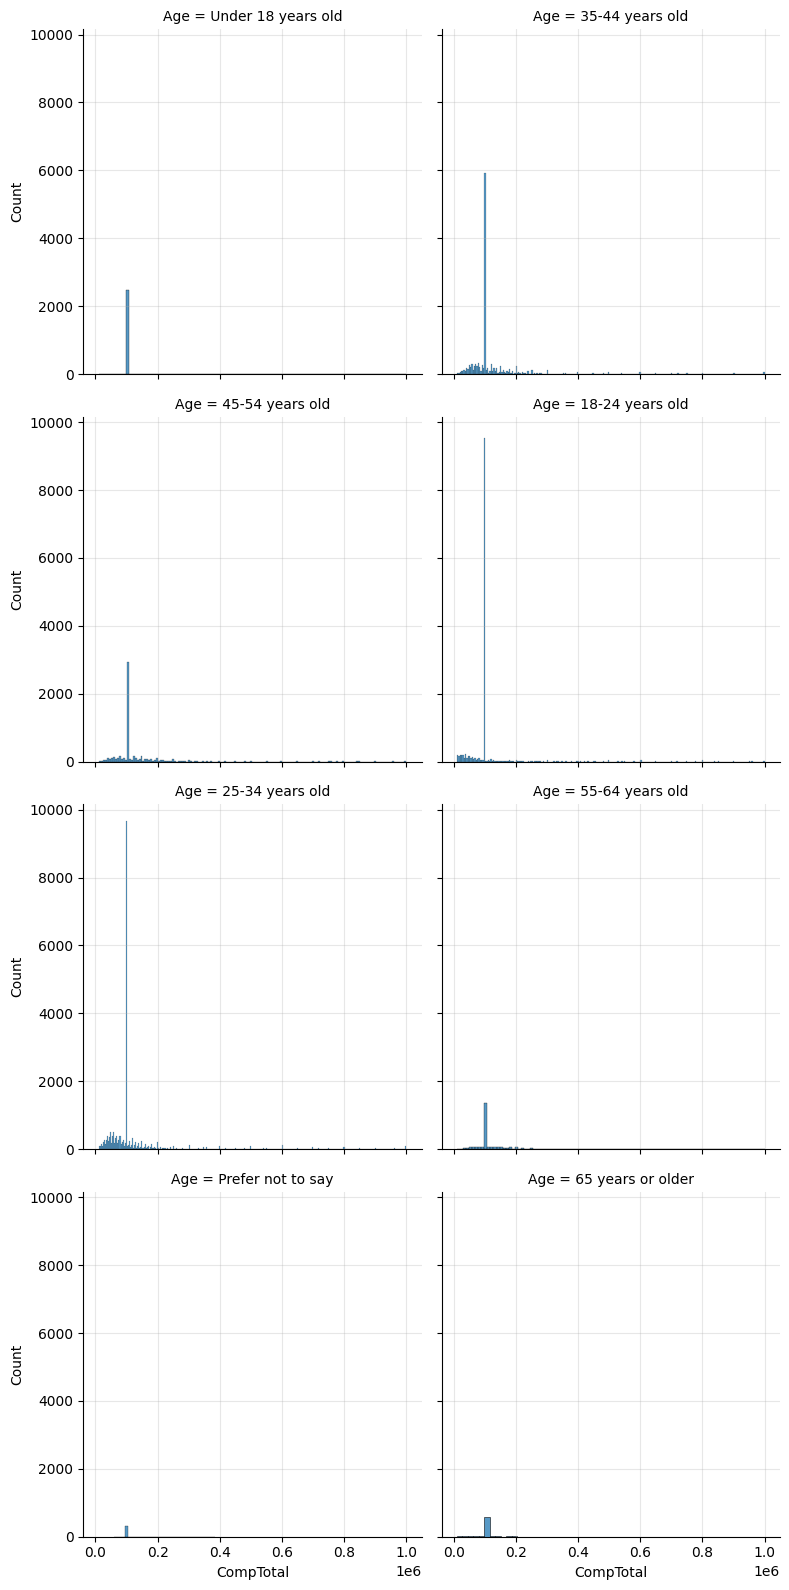

In [96]:
import math

n_age_groups = df_clean['Age'].nunique()
cols_per_row = math.ceil(n_age_groups / 4)

g = sns.FacetGrid(df_clean, col="Age", col_wrap=cols_per_row, height=4)
g.map(sns.histplot, "CompTotal")
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


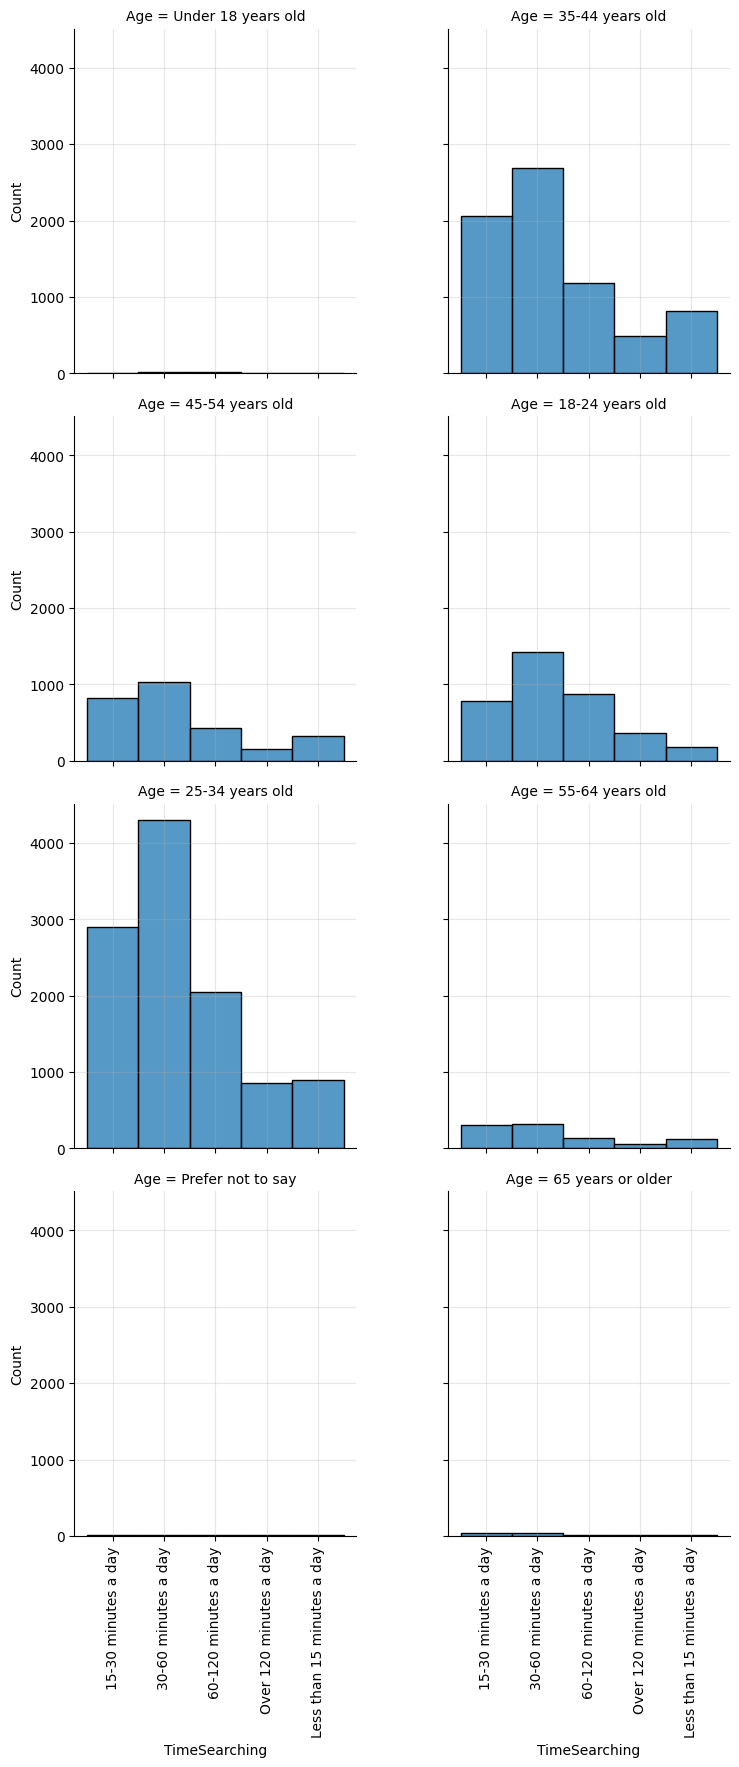

In [97]:
## Write your code here


n_age_groups = df_clean['Age'].nunique()
cols_per_row = math.ceil(n_age_groups / 4)

g = sns.FacetGrid(df_clean, col="Age", col_wrap=cols_per_row, height=4)
g.map(sns.histplot, "TimeSearching")
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=90)
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


In [98]:
DatabaseWantToWorkWith_vc=\
df_clean['DatabaseWantToWorkWith'].value_counts().sort_values(ascending=False)

In [99]:
top_5_DatabaseWantToWorkWith = DatabaseWantToWorkWith_vc[:5]
top_5_DatabaseWantToWorkWith

DatabaseWantToWorkWith
PostgreSQL              3431
PostgreSQL;SQLite       1434
SQLite                  1389
Microsoft SQL Server    1337
MySQL                   1069
Name: count, dtype: int64

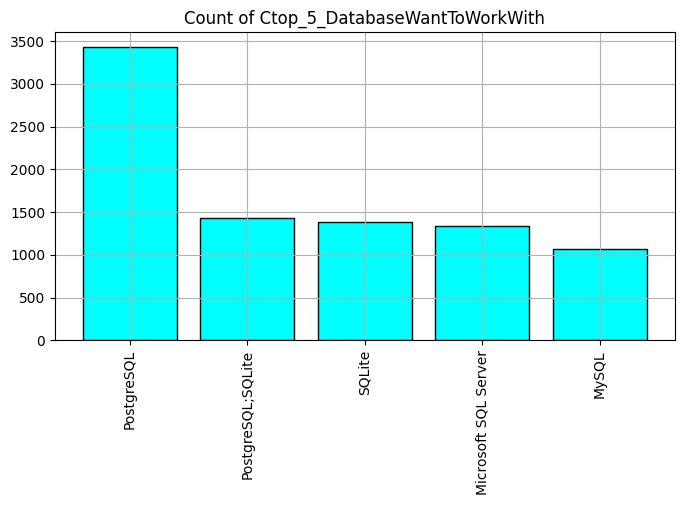

In [100]:
top_5_DatabaseWantToWorkWith
plt.figure(figsize=(8,4))
plt.bar(x=top_5_DatabaseWantToWorkWith.index.tolist(), 
        height=top_5_DatabaseWantToWorkWith.values.tolist() , 
        edgecolor='black',
        color='cyan')
plt.title('Count of Ctop_5_DatabaseWantToWorkWith')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [101]:
db_5_list = top_5_DatabaseWantToWorkWith.index.tolist()

df_db_5 = \
df_clean[df_clean['DatabaseWantToWorkWith'].isin(db_5_list)]

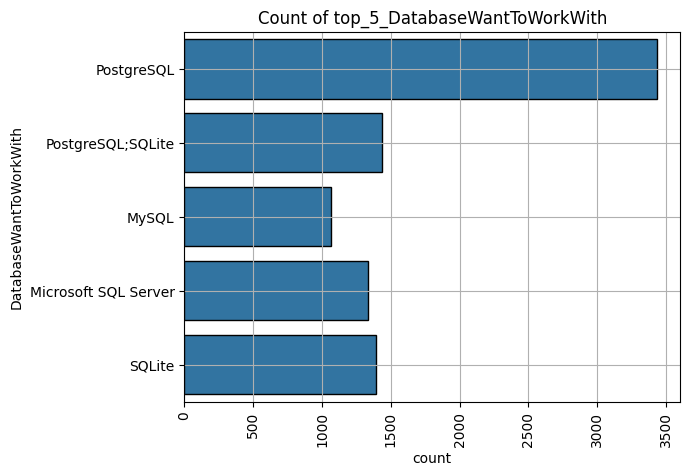

In [102]:
sns.countplot(
    data=df_db_5,
    y='DatabaseWantToWorkWith',
    edgecolor='black'
)
plt.title('Count of top_5_DatabaseWantToWorkWith')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [103]:
## Write your code here

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [104]:
## Write your code here

RemoteWork_unique=\
df_clean['RemoteWork'].unique().tolist()

RemoteWork_unique

['Remote', None, 'In-person', 'Hybrid (some remote, some in-person)']

In [105]:
RemoteWork_mode = \
df_clean['RemoteWork'].mode()[0]

df_clean['RemoteWork'] = df_clean['RemoteWork'].fillna(RemoteWork_mode)

df_clean['RemoteWork'].unique().tolist()

['Remote', 'Hybrid (some remote, some in-person)', 'In-person']

In [111]:
RemoteWork_vc = \
pd.DataFrame(df_clean['RemoteWork'].value_counts())

RemoteWork_vc

,count
RemoteWork,
"Hybrid (some remote, some in-person)",31790
Remote,18952
In-person,9943


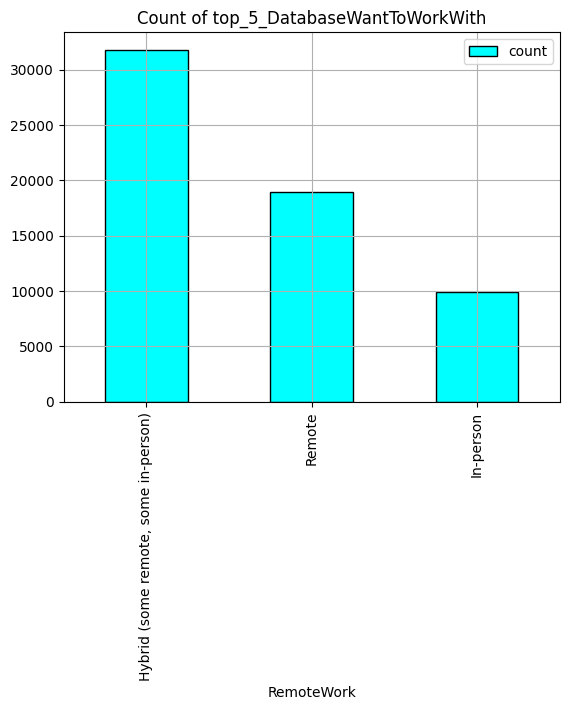

In [115]:
RemoteWork_vc.plot.bar(edgecolor='black',
        color='cyan')
plt.title('Count of RemoteWork types')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

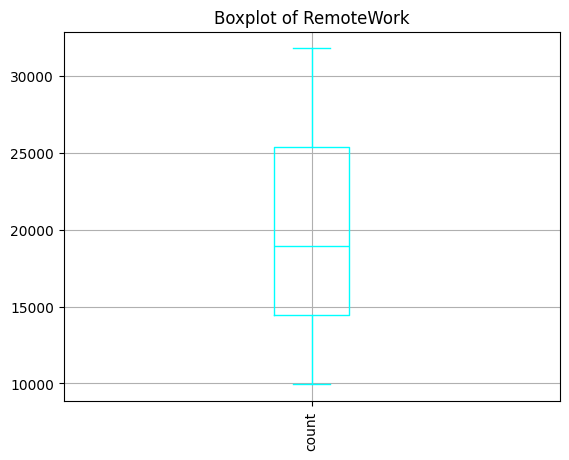

In [118]:
RemoteWork_vc.plot.box(
        color='cyan')
plt.title('Boxplot of RemoteWork')
# plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


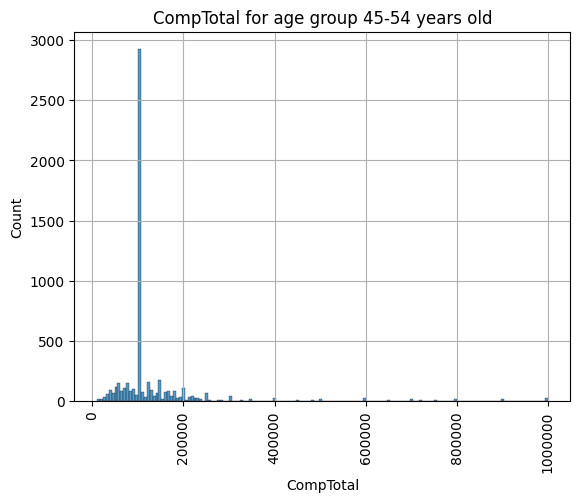

In [127]:
## Write your code here

df_clean['Age'].unique().tolist()

agegroup_45 = '45-54 years old'

df_agegroup_45 = \
df_clean[df_clean['Age'] == agegroup_45]  


sns.histplot(data=df_agegroup_45, x='CompTotal')

plt.title('CompTotal for age group 45-54 years old')
plt.ticklabel_format(style='plain', axis='x') 
plt.xticks(rotation=90)
plt.grid()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


In [132]:
## Write your code here

df_clean.info()

YearsCodePro_unique = \
df_clean['YearsCodePro'].unique().tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 60685 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(14), int64(1), object(99)
memory usage: 53.2+ MB


In [134]:
df_clean.loc[:, 'YearsCodePro_binned'] = pd.cut(df_clean['YearsCodePro'], bins=5)

df_clean.loc[:, 'YearsCodePro_binned'].value_counts()

YearsCodePro_binned
(-0.051, 10.2]    43592
(10.2, 20.4]      10587
(20.4, 30.6]       4722
(30.6, 40.8]       1432
(40.8, 51.0]        352
Name: count, dtype: int64

In [145]:
df_clean.loc[:, 'YearsCodePro_binned_quartiles'] = \
pd.qcut(df_clean['YearsCodePro'], q=[0, .25, .5, .75, 1.], 
        labels=["Q1", "Q2", "Q3", "Q4"])


df_clean.loc[:, 'YearsCodePro_binned_quartiles'] .value_counts(sort=False)

YearsCodePro_binned_quartiles
Q1    22651
Q2     9612
Q3    14088
Q4    14334
Name: count, dtype: int64

In [146]:
df_clean.loc[:, 'YearsCodePro_binned_quartiles'] .value_counts(sort=False).sum()

np.int64(60685)

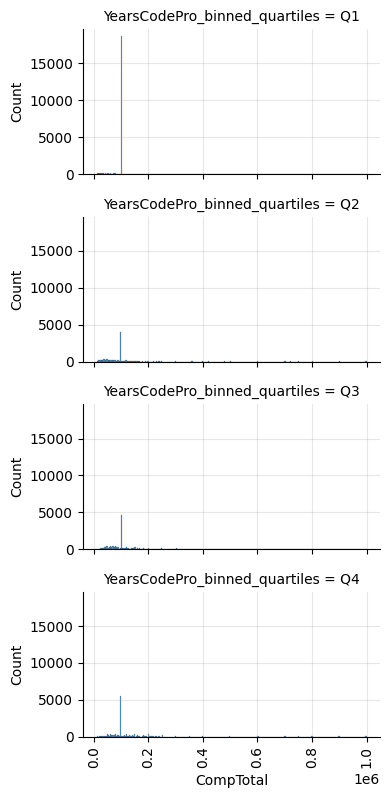

In [151]:

n_age_groups = df_clean.loc[:, 'YearsCodePro_binned_quartiles'].nunique()
cols_per_row = math.ceil(n_age_groups / 4)


g = sns.FacetGrid(df_clean, col="YearsCodePro_binned_quartiles", 
                  col_wrap=cols_per_row, height=2, aspect=2)
g.map(sns.histplot, 'CompTotal')
for ax in g.axes.flat:
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='x', rotation=90)
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [108]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
